# **Install TorchGeo - for datasets**

In [ ]:
!pip install torchgeo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 518.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.0/605.0 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 851.6/851.6 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 818.9/818.9 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.1/541.1 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.9 MB/s eta 0:00:00

# **Import necessary libraries**

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
from torchgeo.datasets import EuroSAT
import matplotlib.pyplot as plt

# **Transform the Data**

In [ ]:
mean = [1354.4055, 1118.2440, 1042.9299,  947.6267, 1199.4727, 1999.7910,
        2369.2219, 2296.8264,  732.0834,   12.1133, 1819.0101, 1118.9237,
        2594.1394]

std = [64.8678, 153.1999, 187.0358, 276.7598, 226.3625, 354.3438, 453.0408,
       528.8685,  98.6171,   1.1803, 374.8333, 301.1572, 499.8868]

class DictTransform:
    def __init__(self, transform):
        self.transform = transform

    def __call__(self, sample):
        sample['image'] = self.transform(sample['image'])
        return sample

transform = DictTransform(transforms.Compose([
    transforms.ConvertImageDtype(torch.float32),   # convert to float
    transforms.Normalize(mean=mean, std=std)
]))

# **Download the dataset**

In [ ]:
train_set = EuroSAT(root = 'data',
                    split = 'train',
                    download = True, transforms = transform)
val_set = EuroSAT(root = 'data',
                  split = 'val',
                  download = True, transforms = transform)
test_set = EuroSAT(root = 'data',
                   split = 'test',
                   download = True, transforms = transform)

100%|██████████| 2.07G/2.07G [00:09<00:00, 210MB/s]
100%|██████████| 314k/314k [00:00<00:00, 7.61MB/s]
100%|██████████| 105k/105k [00:00<00:00, 4.89MB/s]
100%|██████████| 104k/104k [00:00<00:00, 4.44MB/s]


In [ ]:
print(len(train_set))
print(len(val_set))
print(len(test_set))

16200
5400
5400


In [ ]:
print(train_set.classes)

['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


In [17]:
# For calculating mean and std for our dataset

# import torch
# from torch.utils.data import DataLoader
# from torchvision.transforms import ToTensor
# from tqdm import tqdm
# import numpy as np

# # Load raw dataset without any transform
# raw_train_set = EuroSAT(root='data', split='train', download=False)

# # Create DataLoader
# loader = DataLoader(raw_train_set, batch_size=64, shuffle=False)

# # Sum and sum of squares
# mean = torch.zeros(13)
# std = torch.zeros(13)
# nb_samples = 0

# for batch in tqdm(loader):
#     images = batch['image']  # Shape: [B, 13, 64, 64]
#     batch_samples = images.size(0)

#     # Reshape: [B, C, H, W] -> [B, C, H*W]
#     images = images.view(batch_samples, 13, -1)

#     mean += images.mean(2).sum(0)
#     std += images.std(2).sum(0)
#     nb_samples += batch_samples

# # Average
# mean /= nb_samples
# std /= nb_samples

# print("Mean: ", mean)
# print("Std: ", std)


# **Data Loader**

In [ ]:
batch_size = 64

train_loader = DataLoader(train_set, batch_size = batch_size, shuffle = True)
val_loader = DataLoader(val_set, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test_set, batch_size = batch_size, shuffle = False)

In [ ]:
# for batch in train_loader:
#     print(batch['image'].shape)  # Should be [64, 13, 64, 64]
#     print(batch['label'])        # Should be tensor([..]) with values between 0–9
#     break

# for batch in val_loader:
#     print(batch['image'].shape)  # Should be [64, 13, 64, 64]
#     print(batch['label'])        # Should be tensor([..]) with values between 0–9
#     break

# for batch in test_loader:
#     print(batch['image'].shape)  # Should be [64, 13, 64, 64]
#     print(batch['label'])        # Should be tensor([..]) with values between 0–9
#     break

In [ ]:
for data in train_loader:
  X = data["image"]
  y = data["label"]
  print(f"Shape of X[N,C,H,W] = {X.shape}")
  print(f"Shape of y = {y.shape}")
  break

Shape of X[N,C,H,W] = torch.Size([64, 13, 64, 64])
Shape of y = torch.Size([64])


In [7]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


# **Dataset Classes**


In [ ]:
labels_map = {
    0:'AnnualCrop',
    1:'Forest',
    2:'HerbaceousVegetation',
    3:'Highway',
    4:'Industrial',
    5:'Pasture',
    6:'PermanentCrop',
    7:'Residential',
    8:'River',
    9:'SeaLake'
}

# **Visualization of Data**

In [ ]:
mean = torch.tensor([1354.4055, 1118.2440, 1042.9299,  947.6267, 1199.4727, 1999.7910,
                     2369.2219, 2296.8264,  732.0834,   12.1133, 1819.0101, 1118.9237,
                     2594.1394])
std = torch.tensor([64.8678, 153.1999, 187.0358, 276.7598, 226.3625, 354.3438, 453.0408,
                    528.8685,  98.6171,   1.1803, 374.8333, 301.1572, 499.8868])
mean = mean.view(-1, 1, 1)
std = std.view(-1, 1, 1)


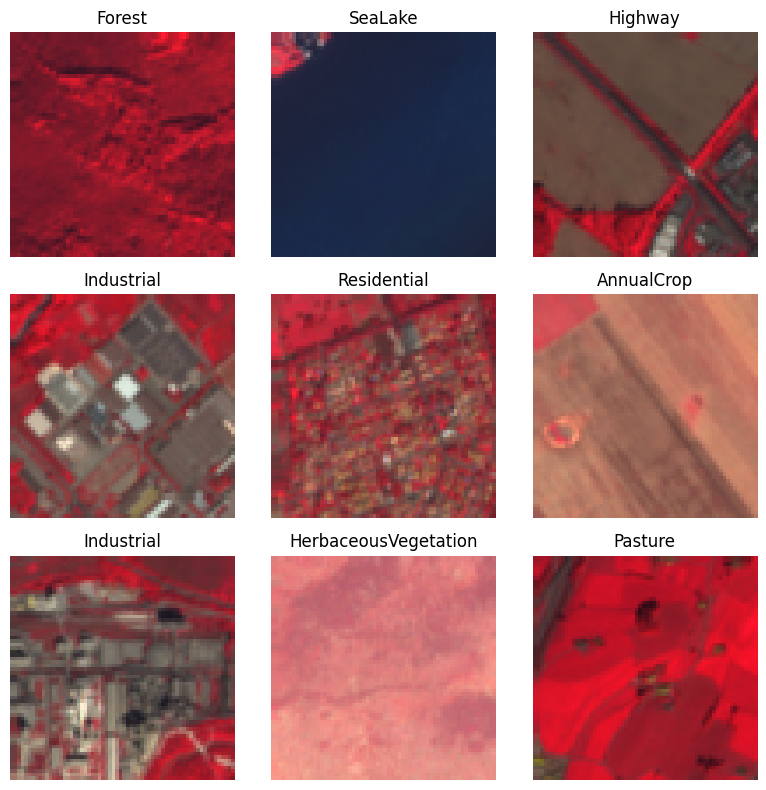

In [ ]:
def denormalize(img, mean, std):
    return img * std + mean

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_set), size=(1,)).item()
    data = train_set[sample_idx]
    img, label = data["image"], data["label"]

    # Denormalize
    img = denormalize(img, mean, std)

    # Select bands for visualization
    rgb_img = torch.stack([img[7], img[3], img[2]], dim=0)

    # Normalize to [0,1] for plotting
    rgb_img = rgb_img / rgb_img.max()

    # Permute to [H, W, C]
    rgb_img = rgb_img.permute(1, 2, 0)

    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label.item()])
    plt.axis("off")
    plt.imshow(rgb_img)

plt.tight_layout()
plt.show()


# **CNN Model**

In [8]:
class ConvNeuralNetwork(nn.Module):
  def __init__(self):
    super(ConvNeuralNetwork, self).__init__()

    # Input Shape of X = [B->64, C->13, H-> 64, W-> 64]

    self.conv1 = nn.Conv2d(in_channels = 13, out_channels = 32, kernel_size = 3, stride = 1, padding = 1) #[B->64, C->32, H-> 64, W-> 64]
    self.relu1 = nn.ReLU()
    self.maxpool1 = nn.MaxPool2d(2)  #[B->64, C->32, H-> 32, W-> 32]

    self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 1, padding = 1)  #[B->64, C->64, H-> 32, W-> 32]
    self.relu2 = nn.ReLU()
    self.maxpool2 = nn.MaxPool2d(2)  #[B->64, C->64, H-> 16, W-> 16]

    self.conv3 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3, stride = 1, padding = 1)  #[B->64, C->128, H-> 16, W-> 16]
    self.relu3 = nn.ReLU()
    self.maxpool3 = nn.MaxPool2d(2)  #[B->64, C->128, H-> 8, W-> 8]

    # Flatten and pass through dense layers

    self.layer1 = nn.Linear(in_features = 128*8*8, out_features = 256)
    self.dropout = nn.Dropout(0.5)
    self.layer2 = nn.Linear(in_features = 256, out_features = 10)

  def forward(self, x):

    x = self.conv1(x)
    x = self.relu1(x)
    x = self.maxpool1(x)

    x = self.conv2(x)
    x = self.relu2(x)
    x = self.maxpool2(x)

    x = self.conv3(x)
    x = self.relu3(x)
    x = self.maxpool3(x)

    x = x.view(x.size(0), -1)  # Flatten: [B, 128*8*8]
    x = self.layer1(x)
    x = self.dropout(x)
    x = self.layer2(x)

    return x

model = ConvNeuralNetwork().to(device)

In [9]:
print(model)

ConvNeuralNetwork(
  (conv1): Conv2d(13, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (layer1): Linear(in_features=8192, out_features=256, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (layer2): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
train_losses = []
train_accuracy = []
val_losses = []
val_accuracy = []
test_losses = []
test_accuracy = []
epoch = []

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    train_loss = 0
    correct = 0

    model.train()
    for batch, img_data in enumerate(dataloader):
        X = img_data["image"]
        y = img_data["label"]
        X, y = X.to(device), y.to(device)

        # Prediction Error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        if batch % 100 == 0:
            current = (batch + 1) * len(X)
            print(f"Loss: {loss.item():>7f} [{current:>5d}/{size:>5d}]")

    # Compute average loss and accuracy
    avg_loss = train_loss / num_batches
    accuracy = correct / size
    print(f"Train Data: \n Accuracy: {(100 * accuracy):>0.1f}%, Avg Loss: {avg_loss:>8f}")

    train_losses.append(avg_loss)
    train_accuracy.append(100 * accuracy)


In [ ]:
def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss, correct = 0, 0
  with torch.no_grad():
    for batch in dataloader:
      X = batch["image"]
      y = batch["label"]
      X, y = X.to(device), y.to(device)
      pred = model(X)

      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1)==y).type(torch.float).sum().item()

  # Compute average loss and accuracy
  avg_loss = test_loss / num_batches
  accuracy = correct / size
  print(f"Test Data: \n Accuracy: {(100*accuracy):>0.1f}%, Avg Loss: {avg_loss:>8f} \n")

  test_losses.append(avg_loss)
  test_accuracy.append(100 * accuracy)

In [ ]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n------------------------")
    train(train_loader, model, loss_fn, optimizer)
    test(test_loader, model, loss_fn)
    epoch.append(t)
print("Done!")

Epoch 1
------------------------
Loss: 2.307365 [   64/16200]
Loss: 0.972519 [ 6464/16200]
Loss: 0.748048 [12864/16200]
Train Data: 
 Accuracy: 66.8%, Avg Loss: 0.960595
Test Data: 
 Accuracy: 81.6%, Avg Loss: 0.578824 

Epoch 2
------------------------
Loss: 0.638231 [   64/16200]
Loss: 0.503767 [ 6464/16200]
Loss: 0.482321 [12864/16200]
Train Data: 
 Accuracy: 82.1%, Avg Loss: 0.535414
Test Data: 
 Accuracy: 85.7%, Avg Loss: 0.426809 

Epoch 3
------------------------
Loss: 0.499339 [   64/16200]
Loss: 0.281605 [ 6464/16200]
Loss: 0.207175 [12864/16200]
Train Data: 
 Accuracy: 86.4%, Avg Loss: 0.413681
Test Data: 
 Accuracy: 83.9%, Avg Loss: 0.471728 

Epoch 4
------------------------
Loss: 0.488894 [   64/16200]
Loss: 0.374526 [ 6464/16200]
Loss: 0.395808 [12864/16200]
Train Data: 
 Accuracy: 88.2%, Avg Loss: 0.355816
Test Data: 
 Accuracy: 89.8%, Avg Loss: 0.314752 

Epoch 5
------------------------
Loss: 0.204453 [   64/16200]
Loss: 0.322634 [ 6464/16200]
Loss: 0.210110 [12864/162

# **Results and Inferences**

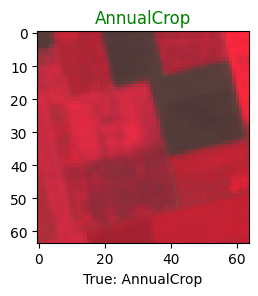

In [ ]:
# Sample random index from test set
sample_idx = torch.randint(len(test_set), size=(1,)).item()
model.eval()

# Extract input and label
x = test_set[sample_idx]["image"]
y = test_set[sample_idx]["label"]

# Move to device and get prediction
with torch.no_grad():
    x_input = x.unsqueeze(0).to(device)
    pred = model(x_input)
    predicted = pred[0].argmax().cpu().item()

# Check prediction correctness
if predicted == y:
  color = "green"
else:
  color = "red"

# Denormalize image
mean = torch.tensor([1354.4055, 1118.2440, 1042.9299,  947.6267, 1199.4727, 1999.7910,
                     2369.2219, 2296.8264,  732.0834,   12.1133, 1819.0101, 1118.9237,
                     2594.1394]).view(-1, 1, 1)
std = torch.tensor([64.8678, 153.1999, 187.0358, 276.7598, 226.3625, 354.3438, 453.0408,
                    528.8685,  98.6171,   1.1803, 374.8333, 301.1572, 499.8868]).view(-1, 1, 1)
x_denorm = x * std + mean

test_img = torch.stack([x_denorm[7], x_denorm[3], x_denorm[2]], dim=0)
test_img = test_img / test_img.max()  # Normalize for visualization
test_img = test_img.permute(1, 2, 0)

plt.figure(figsize=(6, 6))
plt.subplot(1,2,1)
plt.grid(False)
plt.imshow(test_img, cmap='gray')
plt.title(labels_map[predicted], color=color)
plt.xlabel(f"True: {labels_map[y.item()]}", fontsize=10)
plt.show()


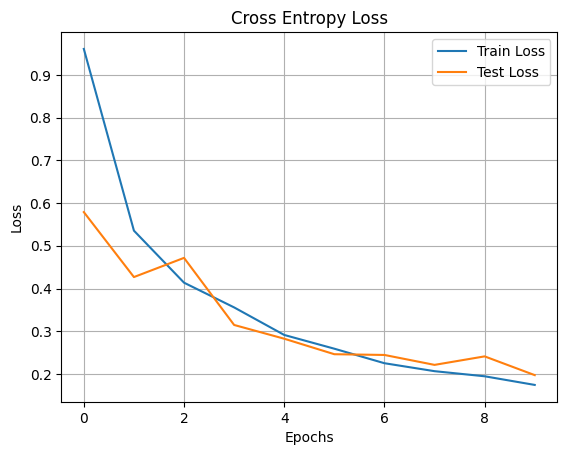

[0.960594553060419, 0.5354143814073773, 0.4136806634350086, 0.3558155707721635, 0.29138271182071507, 0.25920945139029833, 0.22524960337602717, 0.20663463412307378, 0.19469662284933206, 0.17446559608921292] [0.5788243360598297, 0.4268087633721092, 0.47172816347002106, 0.31475196136230166, 0.2825767687013414, 0.24630557201967082, 0.24457885958117379, 0.22136097909499178, 0.24125168361454544, 0.19737390046412817]


In [ ]:
plt.plot(epoch, train_losses, label='Train Loss')
plt.plot(epoch, test_losses, label='Test Loss')
plt.title("Cross Entropy Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.show()

print(train_losses, test_losses)

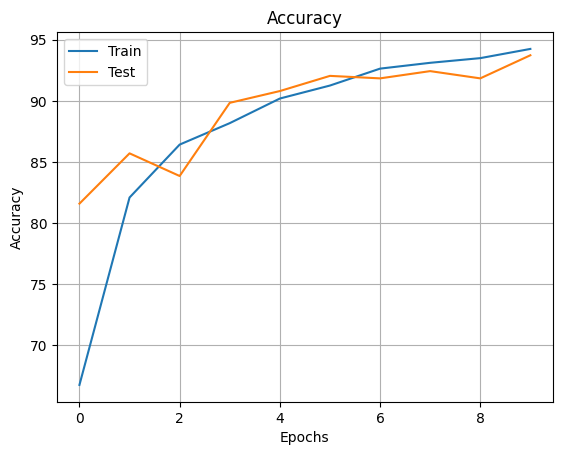

[66.7716049382716, 82.0925925925926, 86.41975308641975, 88.17283950617283, 90.18518518518519, 91.24691358024691, 92.62962962962963, 93.10493827160494, 93.48765432098766, 94.24074074074073] [81.5925925925926, 85.70370370370371, 83.85185185185186, 89.83333333333333, 90.79629629629629, 92.03703703703704, 91.83333333333333, 92.42592592592592, 91.83333333333333, 93.72222222222221]


In [ ]:
plt.plot(epoch, train_accuracy, label='Train')
plt.plot(epoch, test_accuracy, label='Test')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.grid()
plt.legend()
plt.show()

print(train_accuracy, test_accuracy)

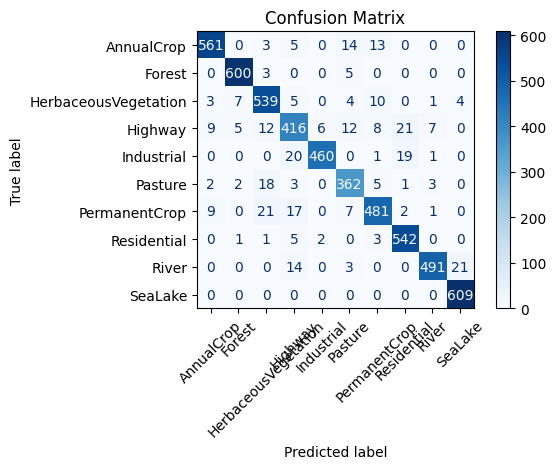

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for batch in test_loader:
        images = batch['image'].to(device)
        labels = batch['label'].to(device)

        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

class_names = train_set.classes

# Create the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()